In [153]:
import pandas as pd
import numpy as np
import seaborn as sb
import copy
import pandas_profiling
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder as ohe, LabelEncoder as le
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cr
%matplotlib inline
warnings.filterwarnings('ignore')

In [154]:
df = pd.read_csv('forModel.csv')

In [155]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015,8,Friday,10,Part Two,washington st,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015,8,Thursday,0,Part Two,charles st,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015,11,Monday,12,Part Two,albany st,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015,7,Friday,10,Part Two,wingate rd,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,12,Tuesday,12,Part Two,upton st,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [186]:
partOne = list(set(df.groupby('ucr_part').get_group('Part One')['offense_code']))
partTwo = list(set(df.groupby('ucr_part').get_group('Part Two')['offense_code']))
partThree = list(set(df.groupby('ucr_part').get_group('Part Three')['offense_code']))
partOther = list(set(df.groupby('ucr_part').get_group('Other')['offense_code']))

In [189]:
for i in df.index:
    if df['offense_code'][i] in partOne:
        df['offense_code'][i] = 'serious_crime'
    elif df['offense_code'][i] in partTwo:
        df['offense_code'][i] = 'intermediate_crime'
    elif df['offense_code'][i] in partThree:
        df['offense_code'][i] = 'low_level_crime'
    elif df['offense_code'][i] in partOther:
        df['offense_code'][i] = 'other_crime'

In [194]:
len(df.offense_code.unique())

4

In [156]:
"""data_profile = pandas_profiling.ProfileReport(df)
data_profile.to_file(output_file = 'final_Data_Profile.html')"""


"data_profile = pandas_profiling.ProfileReport(df)\ndata_profile.to_file(output_file = 'final_Data_Profile.html')"

In [192]:
new_df = copy.deepcopy(df)

In [158]:
new_df = new_df[['offense_code', 'district', 'shooting', 'month', 'day_of_week', 'hour', 'ucr_part', 'lat', 'long']]

In [193]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581351 entries, 0 to 581350
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      581351 non-null  object 
 1   offense_code         581351 non-null  object 
 2   offense_code_group   581351 non-null  object 
 3   offense_description  581351 non-null  object 
 4   district             581351 non-null  object 
 5   reporting_area       581351 non-null  object 
 6   shooting             581351 non-null  int64  
 7   year                 581351 non-null  int64  
 8   month                581351 non-null  int64  
 9   day_of_week          581351 non-null  object 
 10  hour                 581351 non-null  int64  
 11  ucr_part             581351 non-null  object 
 12  street               581351 non-null  object 
 13  lat                  581351 non-null  float64
 14  long                 581351 non-null  float64
 15  location         

In [160]:
df['ucr_part'].dtype

dtype('O')

In [161]:
enc = le()
for i in new_df.columns:
    if new_df[i].dtype == 'O':
        new_df[i] = enc.fit_transform(df[i])

In [162]:
new_df

,offense_code,district,shooting,month,day_of_week,hour,ucr_part,lat,long
0,2647,3,0,8,0,10,3,42.330119,-71.084251
1,1106,5,0,8,4,0,3,42.300605,-71.061268
2,1107,0,0,11,1,12,3,42.334288,-71.072395
3,1107,10,0,7,0,10,3,42.237009,-71.129566
4,1102,8,0,12,5,12,3,42.342432,-71.072258
...,...,...,...,...,...,...,...,...,...
581346,3125,4,0,4,5,6,2,42.268642,-71.095655
581347,3110,3,0,1,3,0,2,42.329600,-71.084620
581348,3801,8,0,7,4,19,2,42.334910,-71.075170
581349,3115,9,0,1,6,9,2,42.325131,-71.099408


<AxesSubplot:>

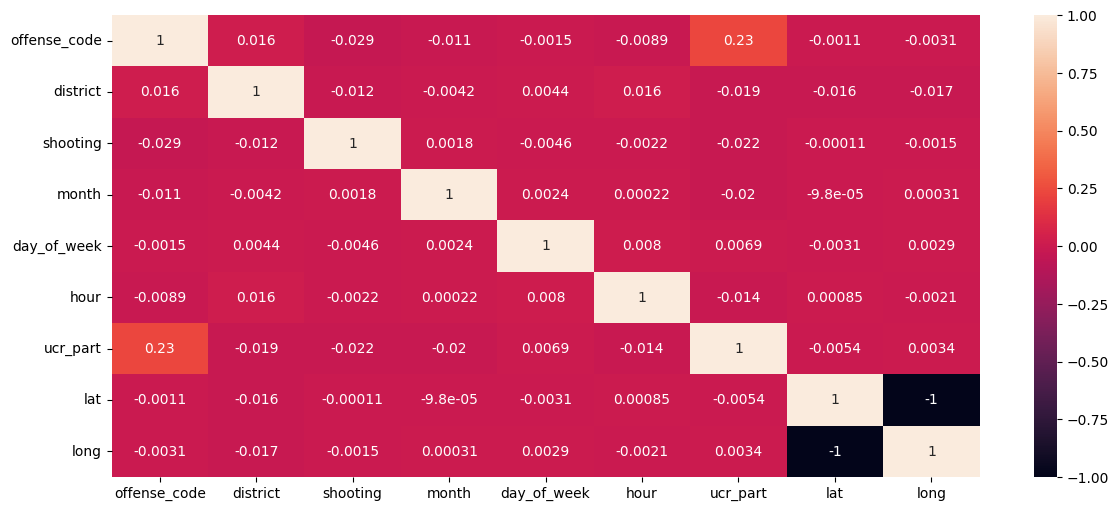

In [163]:
plt.figure(figsize = (14,6))
sb.heatmap(new_df.corr(), vmin = -1, vmax = 1, annot = True)

In [164]:
x = new_df.drop('ucr_part', axis = 1)
y = new_df['ucr_part']

In [171]:
x_train, x_test, y_train, y_test = tts(x,y, test_size = 0.25)

In [172]:
y_train.value_counts()

2    219856
3    127924
1     86642
0      1591
Name: ucr_part, dtype: int64

In [178]:
over_sample = SMOTE(n_jobs = -1)
x_train,y_train= over_sample.fit_resample(x_train,y_train)

In [179]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
pred = dtc.predict(x_test)
pred

array([2, 3, 3, ..., 2, 3, 3])

In [180]:
print(cr(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       584
           1       1.00      1.00      1.00     28751
           2       1.00      1.00      1.00     72975
           3       1.00      1.00      1.00     43028

    accuracy                           1.00    145338
   macro avg       1.00      1.00      1.00    145338
weighted avg       1.00      1.00      1.00    145338



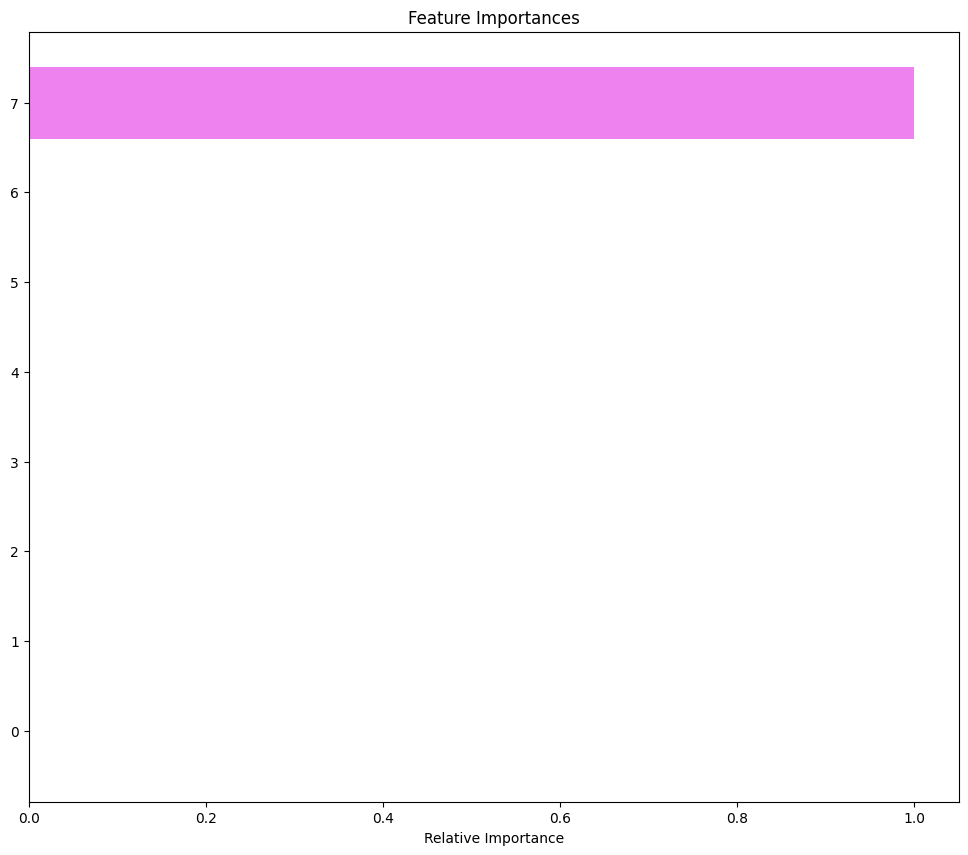

In [177]:


feature_names = list(x.columns)

importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



In [176]:
indices

array([1, 2, 3, 7, 4, 5, 6, 0], dtype=int64)

In [152]:
importances

array([9.98551967e-01, 3.90497733e-05, 0.00000000e+00, 2.79019612e-05,
       1.66366566e-05, 2.13871812e-05, 1.28539895e-03, 5.76583952e-05])

In [188]:
a = [1,2,3,45]
i = 24
i in a

False